In [1042]:
import pandas as pd
import numpy as np
import math
import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt

import scipy
from scipy import stats

# importing necessary modules

In [1043]:
def square(list):
    ret = []
    for i in list:
        ret.append(i ** 2)
    return ret

# defining a function which squares every element of a list

def variance(list):
    ret = (sum(square(list))-(sum(list)**2)/len(list))/(len(list)-1)
    return ret

# defining a function which outputs the variance of a list of values

def st_dev(list):
    ret = variance(list)**0.5
    return ret

# defining a function which outputs the standard deviation of a list of values

def two_sample_t_stat(sample_1, sample_2):
    
    mean_1 = sum(sample_1) / len(sample_1)
    mean_2 = sum(sample_2) / len(sample_2)
    
    var_1 = variance(sample_1)
    var_2 = variance(sample_2)
    
    n_1 = len(sample_1)
    n_2 = len(sample_2)
    
    ret = (mean_1 - mean_2)/((var_1/n_1 + var_2/n_2)**0.5)
    
    return abs(ret)

# defining a function which takes two samples as arguments and outputs the t-stat associated with the
# two-sample t-test to test whether or not the populations from which they're drawn have equal means

def two_sample_degrees_of_freedom(sample_1, sample_2):
    
    var_1 = variance(sample_1)
    var_2 = variance(sample_2)
    
    n_1 = len(sample_1)
    n_2 = len(sample_2)
    
    numerator = (var_1/n_1 + var_2/n_2)**2
    denominator = ((var_1/n_1)**2) / (n_1 - 1) + ((var_2/n_2)**2) / (n_2 - 1)
    
    ret = numerator / denominator
    
    return ret

# defining a function which takes two samples as arguments and outputs the degrees of freedom associated with
# the two-sample t-test

def two_sample_t_test(sample_1, sample_2):
    
    t_stat = two_sample_t_stat(sample_1, sample_2)
    deg_of_freedom = two_sample_degrees_of_freedom(sample_1, sample_2)
    
    p_value = 1 - stats.t.cdf(t_stat, df=deg_of_freedom)
    
    print("p-value:", round(p_value, 5))
    
    return p_value

# defining a function which performs a two-sample t-test on two samples and outputs the p-value associated
# with the test

In [1044]:
def get_t_stat(sample):
    
    n = len(sample)
    
    avg = sum(sample) / n
    
    standard_deviation = st_dev(sample)
    
    t_stat = avg / ( standard_deviation / math.sqrt(n) )
    
    return t_stat

# defining a function which calculates the t-stat associated with a sample vector, where the null hypothesis assumes
# that the mean is zero

def get_p_value(sample):
    
    n = len(sample)
    
    deg_of_freedom = n - 1
    
    t_stat = get_t_stat(sample)
    
    p_value = 1 - stats.t.cdf(t_stat, df=deg_of_freedom)
    
    print("p-value:", p_value)
    
    return p_value

# defining a function which calculates the p-value associated with a sample vector, where the null hypothesis assumes
# that the mean is zero

In [1045]:
def get_beta(x, y):
    
    cov = np.cov(x,y)[1][0]
    beta = cov / variance(x)
    
    return beta

# calculating the beta value for linear regression

def get_alpha(x, y):
    
    beta = get_beta(x,y)
    
    x_bar = sum(x) / len(x)
    y_bar = sum(y) / len(y)
    
    alpha = y_bar-beta*x_bar
    
    return alpha

# calculating the alpha value for linear regression

In [1046]:
def pearsons_correlation_coefficient(sample_1, sample_2):
    
    rho = float("NaN")
    
    if len(sample_1) == len(sample_2):
        
        covariance_matrix = np.cov(sample_1, sample_2)

        sample_1_variance = covariance_matrix[0][0]
        sample_2_variance = covariance_matrix[1][1]
        covariance = covariance_matrix[0][1]

        rho = covariance / ((sample_1_variance*sample_2_variance)**0.5)
        
    else:
        
        print("arguments not same shape")
    
    return rho

# defining a function which calculates the Pearson's Correlation Coefficient from two samples

def pearsons_correlation_coefficient_test(sample_1, sample_2):
    
    p = float("NaN")
    
    if len(sample_1) == len(sample_2):
    
        correlation_coefficient = pearsons_correlation_coefficient(sample_1, sample_2)

        n = len(sample_1)

        dist = scipy.stats.beta(n/2 - 1, n/2 - 1, loc = -1, scale = 2)
        
        p = 2*dist.cdf(-abs(correlation_coefficient))
        
    else:
        print("arguments not same shape")
        
    return p

# defining a function which performs a Pearson's Correlation Coefficient hypothesis test on two samples
# and outputs the p-value associated with the test

In [1047]:
def numerical_to_categorical(input):
    
    ret = float('nan')
    
    if input == 0:
        ret = 'No'
        
    if input == 1:
        ret = 'Yes'
        
    return ret

# defining a function which converts my numerical CEO Duality data into categorical 'Yes' or 'No's

In [1048]:
def get_proportion_of_nans(vector):
    
    vector_withna = vector
    vector_woutna = vector.dropna()
    
    ret = 100*( 1 - len(vector_woutna) / len(vector_withna) )
    
    return ret

In [1049]:
df = pd.read_csv("My Project Data.csv")

# reading my CSV file

print(df.columns)

Index(['Rollover Period', 'Start Date', 'End Date', 'Ticker', 'Name',
       'Exchange Code', 'Sector', 'Market Cap', 'In Europe', 'Earnings Date',
       'CEO_Duality', 'Same Person CEO and Chairman', 'CEO Duality',
       '% Women on Board', '% Independent Directors',
       'Board Meeting Attendance %', 'Average Age of Board',
       'Stock Start Price', 'Stock End Price', 'Stock Returns',
       'Stock Returns * Mkt Cap', 'Adjusted Beta', 'Beta',
       'Main Exchange Code', 'Lookup', 'Synthetic Index Returns',
       'Hedged Returns'],
      dtype='object')


In [1050]:
df = df.iloc[1:] #drop the first row

df = df[df['In Europe'] == True] #removing all datapoints which are not actually based in Europe

df['CEO Duality'] = pd.Series(pd.to_numeric(df['CEO Duality'], errors='coerce'))
df['% Independent Directors'] = pd.Series(pd.to_numeric(df['% Independent Directors'], errors = 'coerce'))
df['Market Cap'] = pd.Series(pd.to_numeric(df['Market Cap'], errors = 'coerce'))
df['% Women on Board'] = pd.Series(pd.to_numeric(df['% Women on Board'], errors = 'coerce'))
df['Board Meeting Attendance %'] = pd.Series(pd.to_numeric(df['Board Meeting Attendance %'], errors = 'coerce'))
df['Average Age of Board'] = pd.Series(pd.to_numeric(df['Average Age of Board'], errors = 'coerce'))

y = df['Hedged Returns']
y[y.notna()] = y[y.notna()].apply(lambda row: row[:-1])
df['Hedged Returns'] = pd.Series(pd.to_numeric(y, errors = 'coerce'))

# converting all columns to numeric values or NaNs, removing % signs in 'Hedged Returns' column

df = df[['Rollover Period', 'Ticker', 'Sector', 'Market Cap', 'CEO Duality', '% Independent Directors', '% Women on Board', 'Board Meeting Attendance %', 
         'Average Age of Board', 'Hedged Returns']]

# limiting my dataframe to the columns I'm interested in

df = df.dropna(subset=['Hedged Returns']) 

#drop rows for which 'Hedged Returns' is an NaN

df = df[abs(df['Hedged Returns']) < 50]

#dropping rows for which the 'Hedged Returns' is great than 50% as these are likely anomolous

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [1051]:
split_point = math.floor(len(df)*2/3)

train_data = df.iloc[split_point:] 
test_data = df.iloc[1:split_point]

# splitting into training and testing sets based on a chronological 1/3 : 2/3 split

train_data = train_data.reset_index()
train_data = train_data[['Ticker', 'Sector', 'Market Cap', 'CEO Duality', '% Independent Directors', '% Women on Board', 'Board Meeting Attendance %',
                         'Average Age of Board', 'Hedged Returns']]

test_data = test_data.reset_index()
test_data = test_data[['Ticker', 'Sector', 'Market Cap', 'CEO Duality', '% Independent Directors', '% Women on Board', 'Board Meeting Attendance %',
                       'Average Age of Board', 'Hedged Returns']]

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



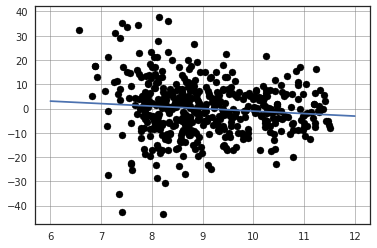

In [1052]:
test_plot_data = df[['CEO Duality', 'Sector', 'Market Cap', 'Hedged Returns']]
test_plot_data = test_plot_data.iloc[split_point:]
test_plot_data2 = test_plot_data[test_plot_data['CEO Duality'] == 1]
test_plot_data2['Log Market Cap'] = np.log(test_plot_data2['Market Cap'])

x = test_plot_data2['Log Market Cap']
y = test_plot_data2['Hedged Returns']

beta = get_beta(x,y)
alpha = get_alpha(x,y)
x2 = np.linspace(6, 12, 2)
y2 = beta*x2+alpha

plt.plot(x2, y2, color='b')

plt.scatter(x, y, color='black')

plt.grid(color='grey', linestyle='-', linewidth=0.5)

In [1053]:
bucket_1 = test_plot_data2[test_plot_data2['Log Market Cap'] < 7]
bucket_2 = test_plot_data2[test_plot_data2['Log Market Cap'] > 7]
bucket_2 = bucket_2[bucket_2['Log Market Cap'] < 8]
bucket_3 = test_plot_data2[test_plot_data2['Log Market Cap'] > 8]
bucket_3 = bucket_3[bucket_3['Log Market Cap'] < 9]
bucket_4 = test_plot_data2[test_plot_data2['Log Market Cap'] > 9]
bucket_4 = bucket_4[bucket_4['Log Market Cap'] < 10]
bucket_5 = test_plot_data2[test_plot_data2['Log Market Cap'] > 10]
bucket_5 = bucket_5[bucket_5['Log Market Cap'] < 11]
bucket_6 = test_plot_data2[test_plot_data2['Log Market Cap'] > 11]
  
avg_1 = sum(bucket_1['Hedged Returns']) / len(bucket_1)
avg_2 = sum(bucket_2['Hedged Returns']) / len(bucket_2)
avg_3 = sum(bucket_3['Hedged Returns']) / len(bucket_3)
avg_4 = sum(bucket_4['Hedged Returns']) / len(bucket_4)
avg_5 = sum(bucket_5['Hedged Returns']) / len(bucket_5)
avg_6 = sum(bucket_6['Hedged Returns']) / len(bucket_6)

avg_6



-1.2965384615384616

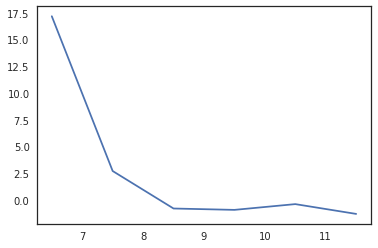

In [1054]:
buckets = [6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
buckets = pd.Series(buckets)

moving_avgs = [avg_1, avg_2, avg_3, avg_4, avg_5, avg_6]
moving_avgs = pd.Series(moving_avgs)


x = buckets
y = moving_avgs

plt.plot(x, y, color='b')
#plt.scatter(x,y, s=20)

# plot showing the average 'Hedged Returns' for buckets of stocks, ordered by 'Market Cap'



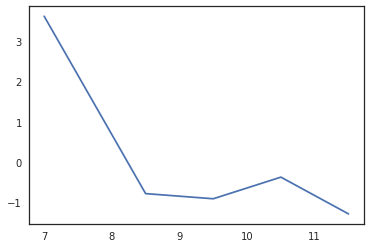

In [1055]:
bucket_1_new = test_plot_data2[test_plot_data2['Log Market Cap'] < 8]
avg_1_new = sum(bucket_1_new['Hedged Returns']) / len(bucket_1_new)

buckets = [7, 8.5, 9.5, 10.5, 11.5]
buckets = pd.Series(buckets)

moving_avgs = [avg_1_new, avg_3, avg_4, avg_5, avg_6]
moving_avgs = pd.Series(moving_avgs)

x = buckets
y = moving_avgs

plt.plot(x, y, color='b')
#plt.scatter(x,y, s=20)

# plot showing the average 'Hedged Returns' for buckets of stocks, ordered by 'Market Cap' [FIRST TWO BUCKETS COMBINED]

In [1056]:
len(bucket_1)

5

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



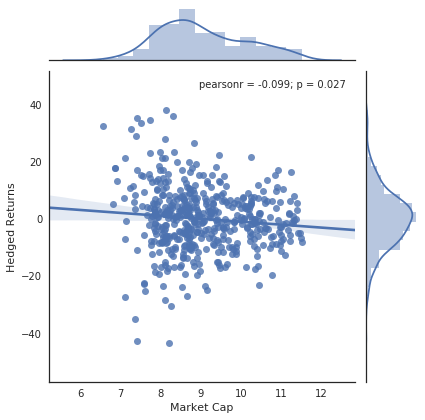

In [1057]:
test_plot_data2['Market Cap'] = np.log(test_plot_data2['Market Cap'])
g = sns.jointplot("Market Cap", "Hedged Returns", data=test_plot_data2, kind="reg")

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



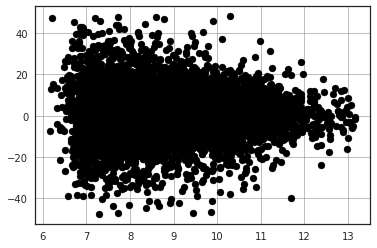

In [1058]:
test_plot_data = df[['CEO Duality', 'Sector', 'Market Cap', 'Hedged Returns']]
test_plot_data = test_plot_data.iloc[split_point:]
test_plot_data3 = test_plot_data[test_plot_data['CEO Duality'] == 0]
test_plot_data3['Log Market Cap'] = np.log(test_plot_data3['Market Cap'])

x = test_plot_data3['Log Market Cap']
y = test_plot_data3['Hedged Returns']

beta = get_beta(x,y)
alpha = get_alpha(x,y)
x2 = np.linspace(6, 12, 2)
y2 = beta*x2+alpha

plt.plot(x2, y2, color='blue')

plt.scatter(x, y, color='black')

plt.grid(color='grey', linestyle='-', linewidth=0.5)

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



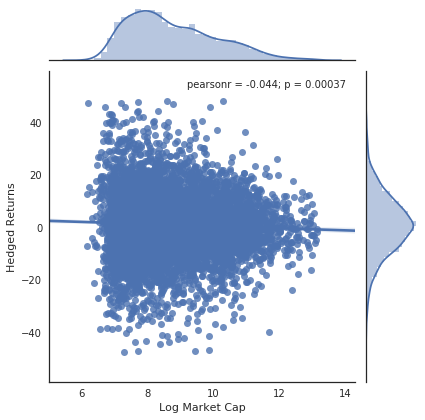

In [1059]:

g = sns.jointplot("Log Market Cap", "Hedged Returns", data=test_plot_data3, kind="reg")

In [1060]:
def get_frequency(df, sector):
    
    length_of_df = len(df)
    
    
    df_new = df[df['Sector'] == sector]
    ret = ( len(df_new) / length_of_df )* 100
    
    return ret

def get_average_market_cap(df, sector):
    
    length_of_df = len(df)
    
    
    df_new = df[df['Sector'] == sector]
    df_new = df_new.dropna()
    ret = ( sum(df_new['Market Cap']) / len(df_new) )
    
    return ret

def get_average_hegded_returns(df, sector):
    
    length_of_df = len(df)
    
    
    df_new = df[df['Sector'] == sector]
    df_new = df_new.dropna()
    ret = ( sum(df_new['Hedged Returns']) / len(df_new) )
    
    
    return ret



In [1070]:
train_data_same = train_data[train_data['CEO Duality'] == 1]
train_data_not_same = train_data[train_data['CEO Duality'] == 0]

In [1125]:
same1 = get_average_hegded_returns(train_data_same, "Financial")
same2 = get_average_hegded_returns(train_data_same, "Technology")
same3 = get_average_hegded_returns(train_data_same, "Basic Materials")
same4 = get_average_hegded_returns(train_data_same, "Consumer, Non-cyclical")
same5 = get_average_hegded_returns(train_data_same, "Consumer, Cyclical")

same6 = get_average_hegded_returns(train_data_same, "Energy")
same7 = get_average_hegded_returns(train_data_same, "Communications")
same8 = get_average_hegded_returns(train_data_same, "Industrial")
same9 = get_average_hegded_returns(train_data_same, "Utilities")

In [1131]:
not_same1 = get_average_hegded_returns(train_data_not_same, "Financial")
not_same2 = get_average_hegded_returns(train_data_not_same, "Technology")
not_same3 = get_average_hegded_returns(train_data_not_same, "Basic Materials")
not_same4 = get_average_hegded_returns(train_data_not_same, "Consumer, Non-cyclical")
not_same5 = get_average_hegded_returns(train_data_not_same, "Consumer, Cyclical")

not_same6 = get_average_hegded_returns(train_data_not_same, "Energy")
not_same7 = get_average_hegded_returns(train_data_not_same, "Communications")
not_same8 = get_average_hegded_returns(train_data_not_same, "Industrial")
not_same9 = get_average_hegded_returns(train_data_not_same, "Utilities")

In [1135]:
array1 = np.array([same1, same2, same3, same4, same5, same6, same7, same8, same9, 
                  not_same1, not_same2, not_same3, not_same4, not_same5, not_same6, not_same7, not_same8, not_same9])
array1 = pd.Series(array1)

array2 = [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]
array3 = ["Fin.", "Tech.", "Mat.","Con. NC", "Con. C"
         , "En.","Comm.", "Ind.", "Util.", "Fin.", "Tech.", "Mat.","Con. NC", "Con. C"
         , "En.","Comm.", "Ind.", "Util." ]

In [1136]:
array1

0     1.140000
1     9.096667
2     3.028400
3     1.355000
4     4.841852
5     0.991429
6    -2.421538
7    -1.813521
8    -3.593913
9    -0.457278
10   -0.927209
11    0.712616
12    1.831730
13    2.242973
14   -0.355506
15    0.065068
16    2.876347
17   -1.227333
dtype: float64

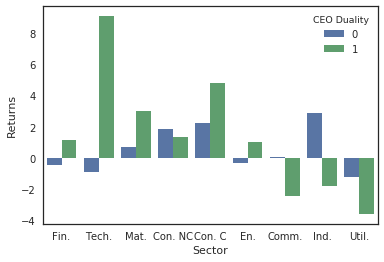

In [1137]:
df = pd.DataFrame(columns = ['Sector', 'Returns', 'CEO Duality'])
df['Returns'] = array1
df['CEO Duality'] = array2
df['Sector'] = array3
df

g = sns.barplot(x="Sector", y="Returns", hue="CEO Duality", data=df)


#sns.catplot(x="Sector", y="Returns", hue="CEO Duality", data=df,
 #               height=6, kind="bar", palette="muted")
    
    # neaten

<BarContainer object of 8 artists>

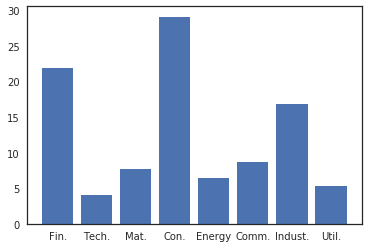

In [1077]:
financial_frequency = get_frequency(train_data, "Financial")
tech_frequency = get_frequency(train_data, "Technology")
mat_frequency = get_frequency(train_data, "Basic Materials")
con_non_cyc_frequency = get_frequency(train_data, "Consumer, Non-cyclical")
con_cyc_frequency = get_frequency(train_data, "Consumer, Cyclical")

consumer_frequency = con_non_cyc_frequency + con_cyc_frequency
energy_frequency = get_frequency(train_data, "Energy")
communications_frequency = get_frequency(train_data, "Communications")
industrial_frequency = get_frequency(train_data, "Industrial")
utilities_frequency = get_frequency(train_data, "Utilities")


plt.bar(['Fin.', 'Tech.', 'Mat.', 'Con.',
        'Energy', 'Comm.', 'Indust.', 'Util.'], [financial_frequency, tech_frequency, mat_frequency,
                                                                consumer_frequency, energy_frequency,
                                                                communications_frequency, industrial_frequency, utilities_frequency], width=0.8)



<BarContainer object of 8 artists>

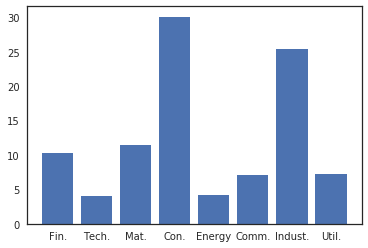

In [1078]:
train_data_same = train_data[train_data['CEO Duality'] == 1]


financial_frequency_same = get_frequency(train_data_same, "Financial")
tech_frequency_same = get_frequency(train_data_same, "Technology")
mat_frequency_same = get_frequency(train_data_same, "Basic Materials")
con_non_cyc_frequency_same = get_frequency(train_data_same, "Consumer, Non-cyclical")
con_cyc_frequency_same = get_frequency(train_data_same, "Consumer, Cyclical")

consumer_frequency_same = con_non_cyc_frequency_same + con_cyc_frequency_same
energy_frequency_same = get_frequency(train_data_same, "Energy")
communications_frequency_same = get_frequency(train_data_same, "Communications")
industrial_frequency_same = get_frequency(train_data_same, "Industrial")
utilities_frequency_same = get_frequency(train_data_same, "Utilities")


plt.bar(['Fin.', 'Tech.', 'Mat.', 'Con.',
        'Energy', 'Comm.', 'Indust.', 'Util.'], [financial_frequency_same, tech_frequency_same, mat_frequency_same,
                                                                consumer_frequency_same, energy_frequency_same,
                                                                communications_frequency_same, industrial_frequency_same, utilities_frequency_same], width=0.8)


<BarContainer object of 8 artists>

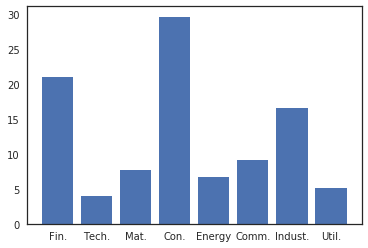

In [1079]:
train_data_not_same = train_data[train_data['CEO Duality'] == 0]


financial_frequency_not_same = get_frequency(train_data_not_same, "Financial")
tech_frequency_not_same = get_frequency(train_data_not_same, "Technology")
mat_frequency_not_same = get_frequency(train_data_not_same, "Basic Materials")
con_non_cyc_frequency_not_same = get_frequency(train_data_not_same, "Consumer, Non-cyclical")
con_cyc_frequency_not_same = get_frequency(train_data_not_same, "Consumer, Cyclical")

consumer_frequency_not_same = con_non_cyc_frequency_not_same + con_cyc_frequency_not_same
energy_frequency_not_same = get_frequency(train_data_not_same, "Energy")
communications_frequency_not_same = get_frequency(train_data_not_same, "Communications")
industrial_frequency_not_same = get_frequency(train_data_not_same, "Industrial")
utilities_frequency_not_same = get_frequency(train_data_not_same, "Utilities")


plt.bar(['Fin.', 'Tech.', 'Mat.', 'Con.',
        'Energy', 'Comm.', 'Indust.', 'Util.'], [financial_frequency_not_same, tech_frequency_not_same, mat_frequency_not_same,
                                                                consumer_frequency_not_same, energy_frequency_not_same,
                                                                communications_frequency_not_same, industrial_frequency_not_same, utilities_frequency_not_same], width=0.8)


# this approximately agrees with my priors

<BarContainer object of 8 artists>

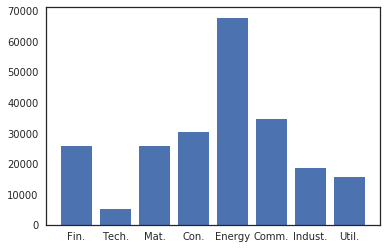

In [1065]:
financial_average_market_cap = get_average_market_cap(train_data, "Financial")
tech_average_market_cap = get_average_market_cap(train_data, "Technology")
mat_average_market_cap = get_average_market_cap(train_data, "Basic Materials")
con_non_cyc_average_market_cap = get_average_market_cap(train_data, "Consumer, Non-cyclical")
con_cyc_average_market_cap = get_average_market_cap(train_data, "Consumer, Cyclical")

consumer_average_market_cap = (con_non_cyc_average_market_cap + con_cyc_average_market_cap) / 2
energy_average_market_cap = get_average_market_cap(train_data, "Energy")
communications_average_market_cap = get_average_market_cap(train_data, "Communications")
industrial_average_market_cap = get_average_market_cap(train_data, "Industrial")
utilities_average_market_cap = get_average_market_cap(train_data, "Utilities")


plt.bar(['Fin.', 'Tech.', 'Mat.', 'Con.',
        'Energy', 'Comm.', 'Indust.', 'Util.'], [financial_average_market_cap, tech_average_market_cap, mat_average_market_cap,
                                                                consumer_average_market_cap, energy_average_market_cap,
                                                                communications_average_market_cap, industrial_average_market_cap, utilities_average_market_cap], width=0.8)

# plot of average market cap of various sectors of my universe

<BarContainer object of 8 artists>

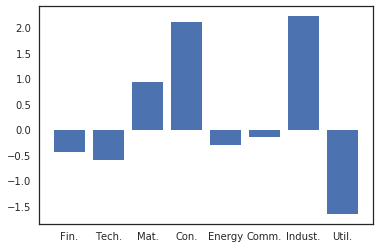

In [1066]:
financial_average_hegded_returns = get_average_hegded_returns(train_data, "Financial")
tech_average_hegded_returns = get_average_hegded_returns(train_data, "Technology")
mat_average_hegded_returns = get_average_hegded_returns(train_data, "Basic Materials")
con_non_cyc_average_hegded_returns = get_average_hegded_returns(train_data, "Consumer, Non-cyclical")
con_cyc_average_hegded_returns = get_average_hegded_returns(train_data, "Consumer, Cyclical")

consumer_average_hegded_returns = (con_non_cyc_average_hegded_returns + con_cyc_average_hegded_returns) / 2
energy_average_hegded_returns = get_average_hegded_returns(train_data, "Energy")
communications_average_hegded_returns = get_average_hegded_returns(train_data, "Communications")
industrial_average_hegded_returns = get_average_hegded_returns(train_data, "Industrial")
utilities_average_hegded_returns = get_average_hegded_returns(train_data, "Utilities")


plt.bar(['Fin.', 'Tech.', 'Mat.', 'Con.',
        'Energy', 'Comm.', 'Indust.', 'Util.'], [financial_average_hegded_returns, tech_average_hegded_returns, mat_average_hegded_returns,
                                                                consumer_average_hegded_returns, energy_average_hegded_returns,
                                                                communications_average_hegded_returns, industrial_average_hegded_returns, utilities_average_hegded_returns], width=0.8)

# plot of average market cap of various sectors of my universe

<BarContainer object of 8 artists>

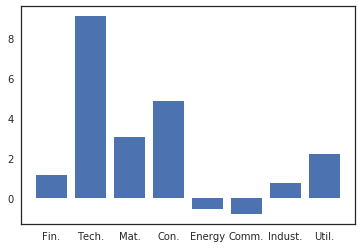

In [1067]:
train_data_same = train_data[train_data['CEO Duality'] == 1]

financial_average_hegded_returns1 = get_average_hegded_returns(train_data_same, "Financial")
tech_average_hegded_returns1 = get_average_hegded_returns(train_data_same, "Technology")
mat_average_hegded_returns1 = get_average_hegded_returns(train_data_same, "Basic Materials")
con_non_cyc_average_hegded_returns1 = get_average_hegded_returns(train_data_same, "Consumer, Non-cyclical")
con_cyc_average_hegded_returns1 = get_average_hegded_returns(train_data_same, "Consumer, Cyclical")

train_data_same = test_data_same.dropna()


#mktcp1 = get_average_market_cap(test_data_same, "Consumer, Non-Cyclical")
mktcp2 = get_average_market_cap(train_data_same, "Consumer, Cyclical")



consumer_average_hegded_returns1 = ( con_non_cyc_average_hegded_returns1 + con_cyc_average_hegded_returns1*mktcp2 ) / (mktcp2)
energy_average_hegded_returns1 = get_average_hegded_returns(train_data_same, "Energy")
communications_average_hegded_returns1 = get_average_hegded_returns(train_data_same, "Communications")
industrial_average_hegded_returns1 = get_average_hegded_returns(train_data_same, "Industrial")
utilities_average_hegded_returns1 = get_average_hegded_returns(train_data_same, "Utilities")


plt.bar(['Fin.', 'Tech.', 'Mat.', 'Con.',
        'Energy', 'Comm.', 'Indust.', 'Util.'], [financial_average_hegded_returns1, tech_average_hegded_returns1, mat_average_hegded_returns1,
                                                                consumer_average_hegded_returns1, energy_average_hegded_returns1,
                                                                communications_average_hegded_returns1, industrial_average_hegded_returns1, utilities_average_hegded_returns1], width=0.8)

# plot of average market cap of various sectors of my universe

<BarContainer object of 8 artists>

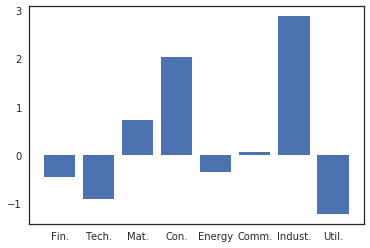

In [1068]:
train_data_not_same = train_data[train_data['CEO Duality'] == 0]

financial_average_hegded_returns2 = get_average_hegded_returns(train_data_not_same, "Financial")
tech_average_hegded_returns2 = get_average_hegded_returns(train_data_not_same, "Technology")
mat_average_hegded_returns2 = get_average_hegded_returns(train_data_not_same, "Basic Materials")
con_non_cyc_average_hegded_returns2 = get_average_hegded_returns(train_data_not_same, "Consumer, Non-cyclical")
con_cyc_average_hegded_returns2 = get_average_hegded_returns(train_data_not_same, "Consumer, Cyclical")

consumer_average_hegded_returns2 = (con_non_cyc_average_hegded_returns2 + con_cyc_average_hegded_returns2) / 2
energy_average_hegded_returns2 = get_average_hegded_returns(train_data_not_same, "Energy")
communications_average_hegded_returns2 = get_average_hegded_returns(train_data_not_same, "Communications")
industrial_average_hegded_returns2 = get_average_hegded_returns(train_data_not_same, "Industrial")
utilities_average_hegded_returns2 = get_average_hegded_returns(train_data_not_same, "Utilities")


plt.bar(['Fin.', 'Tech.', 'Mat.', 'Con.',
        'Energy', 'Comm.', 'Indust.', 'Util.'], [financial_average_hegded_returns2, tech_average_hegded_returns2, mat_average_hegded_returns2,
                                                                consumer_average_hegded_returns2, energy_average_hegded_returns2,
                                                                communications_average_hegded_returns2, industrial_average_hegded_returns2, utilities_average_hegded_returns2], width=0.8)

# plot of average market cap of various sectors of my universe

In [993]:
ceo_chm_not_same = [financial_average_hegded_returns2, tech_average_hegded_returns2, 
                mat_average_hegded_returns2, consumer_average_hegded_returns2,  
                energy_average_hegded_returns2, communications_average_hegded_returns2,  
                industrial_average_hegded_returns2, utilities_average_hegded_returns2 ]

ceo_chm_not_same


[-0.2862885948330185,
 2.6416352201257864,
 0.001862416107382989,
 0.6263533998692814,
 -0.6415202702702703,
 -0.24319397993310854,
 -0.49791028446389424,
 2.170394736842105]

In [956]:
ceo_chm_same = [financial_average_hegded_returns1, tech_average_hegded_returns1, 
                mat_average_hegded_returns1, consumer_average_hegded_returns1,  
                energy_average_hegded_returns1, communications_average_hegded_returns1,  
                industrial_average_hegded_returns1, utilities_average_hegded_returns1 ]

# make a comparative bar plot

In [994]:
ceo_chm_same = pd.Series(ceo_chm_same)
ceo_chm_same

0    4.188889
1    3.702857
2   -3.295577
3    0.126207
4   -0.566364
5   -0.808767
6    0.724081
7    2.208113
dtype: float64

In [1007]:
bar_plot_data = pd.DataFrame(np.array([ceo_chm_same, ceo_chm_not_same]), columns = ['Financial', 'Technology', 'Materials',
                                                                                   'Consumer', 'Energy', 'Communications',
                                                                                   'Industrial', 'Utilities'])
bar_plot_data
#ax = sns.barplot(x="1", y="Financial", data=bar_plot_data)

,Financial,Technology,Materials,Consumer,Energy,Communications,Industrial,Utilities
0,4.188889,3.702857,-3.295577,0.126207,-0.566364,-0.808767,0.724081,2.208113
1,-0.286289,2.641635,0.001862,0.626353,-0.641520,-0.243194,-0.497910,2.170395


In [975]:
my_dataframe = pd.DataFrame(index = ['Financial', 'Tech', 'Materials', 'Consumer',
                                    'Energy', 'Communications', 'Industrial', 'Utilities'],
                            columns = ['CEO same', 'CEO not same'])

my_dataframe = pd.DataFrame([[ceo_chm_same], [ceo_chm_not_same]])

my_dataframe['CEO same'] = ceo_chm_same

my_dataframe

,0,CEO same
0,0 4.188889 1 3.702857 2 -3.295577 3 ...,4.188889
1,"[-0.2862885948330185, 2.6416352201257864, 0.00...",3.702857


In [680]:
for x in ['CEO Duality','% Independent Directors', '% Women on Board', 
          'Board Meeting Attendance %', 'Average Age of Board']:
    
    print(x, ": ", round(get_proportion_of_nans(train_data[x]), 1), "%")

CEO Duality :  3.3 %
% Independent Directors :  17.4 %
% Women on Board :  6.7 %
Board Meeting Attendance % :  29.2 %
Average Age of Board :  39.6 %


CEO and CHMN same: 495
CEO and CHMN not same: 6559


<BarContainer object of 2 artists>

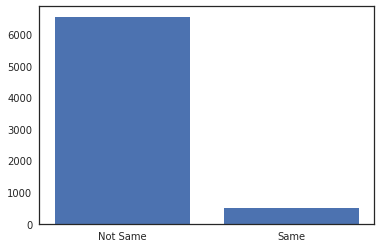

In [681]:
# Here we should make some statistical plots based on the predictors 
# (without looking at the responders) and maybe look at the number of NaNs

train_data
#plot_1 = sns.distplot(CEO_CHMN_plot_data['CEO Duality'])

CEO_and_CHMN_same = []
CEO_and_CHMN_not_same = []

for i in range(0, len(train_data)):
    if train_data['CEO Duality'][i] == 1:
        CEO_and_CHMN_same.append(train_data['Hedged Returns'][i])
        
for i in range(0, len(train_data)):
    if train_data['CEO Duality'][i] == 0:
        CEO_and_CHMN_not_same.append(train_data['Hedged Returns'][i])
        
CEO_and_CHMN_same_withna = CEO_and_CHMN_same.copy()
CEO_and_CHMN_not_same_withna = CEO_and_CHMN_not_same.copy()

CEO_and_CHMN_same = [x for x in CEO_and_CHMN_same if str(x) != 'nan']
CEO_and_CHMN_not_same = [x for x in CEO_and_CHMN_not_same if str(x) != 'nan']


sample_size_1 = len(CEO_and_CHMN_same)
sample_size_2 = len(CEO_and_CHMN_not_same)

print("CEO and CHMN same:", sample_size_1)
print("CEO and CHMN not same:", sample_size_2)

plt.bar(['Not Same', 'Same'], [sample_size_2,sample_size_1], width=0.8) # the number of datapoints is vastly different

In [772]:
CEO_and_CHMN_same = pd.Series(CEO_and_CHMN_same)

CEO_and_CHMN_same.describe()

count    495.000000
mean      -0.067556
std       11.068552
min      -43.310000
25%       -6.770000
50%        0.020000
75%        6.080000
max       37.910000
dtype: float64

In [773]:
CEO_and_CHMN_not_same = pd.Series(CEO_and_CHMN_not_same)
CEO_and_CHMN_not_same.describe()

count    6559.000000
mean        0.873141
std        12.185149
min       -47.680000
25%        -6.340000
50%         0.760000
75%         8.120000
max        48.250000
dtype: float64

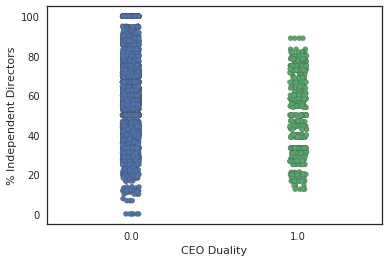

In [682]:
# plot % Independent Directors against CEO Duality

plot_data_1 = train_data[['CEO Duality', '% Independent Directors']]
plot_test = sns.stripplot(x="CEO Duality", y="% Independent Directors", 
                          data=plot_data_1, jitter = 0.05, linewidth = 0.25)

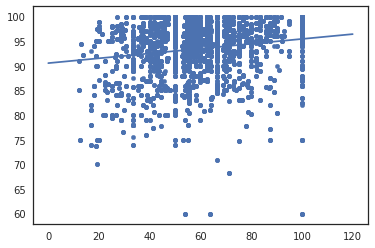

In [756]:
plot_data_2 = train_data[['% Independent Directors', 'Board Meeting Attendance %']]
plot_data_2 = plot_data_2.dropna()

x = plot_data_2['% Independent Directors']
y = plot_data_2['Board Meeting Attendance %'].clip(60)

alpha = get_alpha(x,y)
beta = get_beta(x,y)

# calculating the parameters for the line of best fit

x2 = np.linspace(0, 120, 2)
y2 = beta*x2+alpha

plt.plot(x2, y2, color='b')
plt.scatter(x,y, s=20)

# plotting the Hedged Returns against the % of Independent Directors as well as the line of best fit

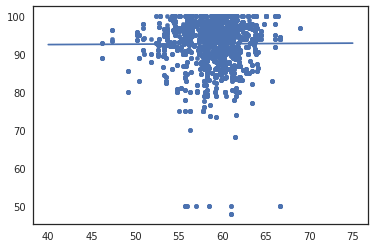

In [684]:
plot_data_3 = train_data[['Average Age of Board', 'Board Meeting Attendance %']]
plot_data_3 = plot_data_3.dropna()

x = plot_data_3['Average Age of Board']
y = plot_data_3['Board Meeting Attendance %']

alpha = get_alpha(x,y)
beta = get_beta(x,y)

# calculating the parameters for the line of best fit

x2 = np.linspace(40, 75, 2)
y2 = beta*x2+alpha

plt.plot(x2, y2, color='b')
plt.scatter(x,y, s=20)

# plotting the Hedged Returns against the % of Independent Directors as well as the line of best fit

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



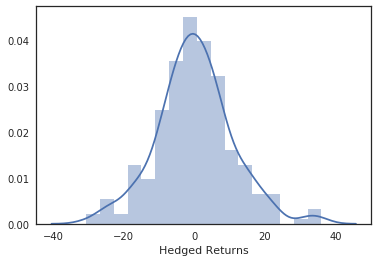

In [685]:
CEO_CHMN_plot_data = train_data.dropna()
plot_1 = sns.distplot(CEO_CHMN_plot_data[CEO_CHMN_plot_data['CEO Duality']==1]['Hedged Returns'])

# plotting the distribution of Hedged Returns for case where CEO and CHMN are the same person

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



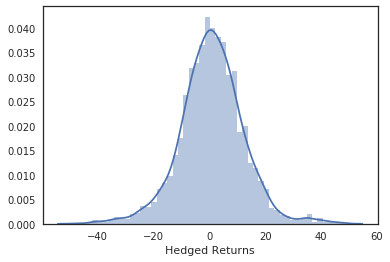

In [686]:
plot_2 = sns.distplot(CEO_CHMN_plot_data[CEO_CHMN_plot_data['CEO Duality']==0]['Hedged Returns'])

# plotting the distribution of Hedged Returns for case where CEO and CHMN are not the same person

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



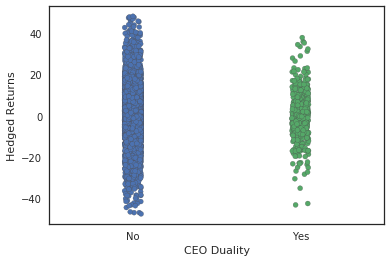

In [687]:
categorical_plot_data = train_data[['CEO Duality', 'Hedged Returns']]
categorical_plot_data['CEO Duality'] = [numerical_to_categorical(x) for x in categorical_plot_data['CEO Duality']]

# creating a set of categorical data to build plots for 'Hedged Returns' against 'CEO Duality'

plot_3 = sns.stripplot(x="CEO Duality", y="Hedged Returns", data=categorical_plot_data, jitter = 0.05,  linewidth = 0.25)

# plotting the distributions of 'Hedged Returns' with and without CEO Duality together

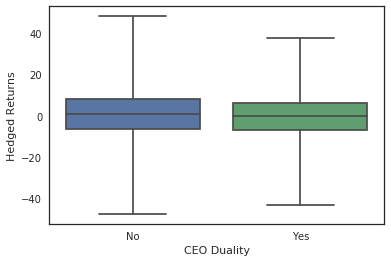

In [688]:
plot_4 = sns.boxplot(x="CEO Duality", y="Hedged Returns", data=categorical_plot_data, whis=np.inf)

# plotting Box and Whisker diagrams, showing the range, interquartile range and median of each of the distributions.
# From the diagrams, we can see that the data tends to be clustered around the median. We can also see that the median
# hedged return is slightly higher without CEO Duality (this agrees with our prior)

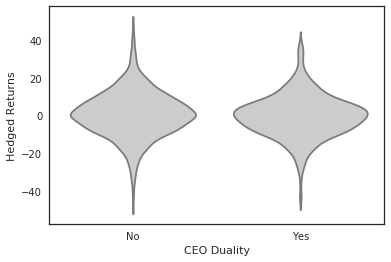

In [755]:
plot_5 = sns.violinplot(x="CEO Duality", y="Hedged Returns", data=categorical_plot_data,
                     inner=None, color=".8", height=10)

#plotting a violin plot to compare the distributions

In [690]:
#plot_6 =  sns.stripplot("CEO Duality", "Hedged Returns", data=categorical_plot_data,
#                    palette="Set2", size=20, marker="D",
#                    edgecolor="gray", alpha=.25)

# plotting another diagram to show the distributions

In [691]:
CEO_and_CHMN_same = []
CEO_and_CHMN_not_same = []

for i in range(0, len(train_data)):
    if train_data['CEO Duality'][i] == 1:
        CEO_and_CHMN_same.append(train_data['Hedged Returns'][i])
        
for i in range(0, len(train_data)):
    if train_data['CEO Duality'][i] == 0:
        CEO_and_CHMN_not_same.append(train_data['Hedged Returns'][i])

CEO_and_CHMN_same = [x for x in CEO_and_CHMN_same if str(x) != 'nan']
CEO_and_CHMN_not_same = [x for x in CEO_and_CHMN_not_same if str(x) != 'nan']

# seperating my data into two lists: the 'Hedged Returns' for instances where CEO and CHMN are the same, and the
# list for where they are different, so as to perform a statistical test

In [692]:
avg_returns_CEO_CHMN_same = sum(CEO_and_CHMN_same) / len(CEO_and_CHMN_same)
avg_returns_CEO_CHMN_not_same = sum(CEO_and_CHMN_not_same) / len(CEO_and_CHMN_not_same)

print("CEO and CHMN same:", round(avg_returns_CEO_CHMN_same, 5))
print("CEO and CHMN not same:", round(avg_returns_CEO_CHMN_not_same, 5))

CEO and CHMN same: -0.06756
CEO and CHMN not same: 0.87314


In [980]:
two_sample_t_stat(CEO_and_CHMN_same, CEO_and_CHMN_not_same)

1.8099084342913332

In [981]:
two_sample_t_test(CEO_and_CHMN_same, CEO_and_CHMN_not_same)

# running the two-sample t-test on my data

p-value: 0.03541


0.03541014821303001

In [728]:
# here I am going to do my PnL test for CEO duality trade

rollover_periods={}

for i in range(1,17):
    rollover_periods[i]= df[df['Rollover Period'] == i]
    rollover_periods[i] = rollover_periods[i][['CEO Duality', 'Market Cap', 'Hedged Returns']].dropna()

# rollover period dictionary calls the ith rolled over universe from my data

ceo_same_dict={}
ceo_not_same_dict = {}
avg_pnl_ceo_same = []
avg_pnl_ceo_not_same = []

# creating some empty dictionaries and lists


for i in range(1,17):
    ceo_same_dict[i] = rollover_periods[i][rollover_periods[i]['CEO Duality'] == 1]
    ceo_not_same_dict[i] = rollover_periods[i][rollover_periods[i]['CEO Duality'] == 0]
    
# creating separate dictionaries for rollover periods with CEO and CHMN same and not same respectively 
    
for i in range(1,17):
    avg_pnl_ceo_same.append(sum(ceo_same_dict[i]['Hedged Returns']*(-1)) / len(ceo_same_dict[i]['Hedged Returns']))
    avg_pnl_ceo_not_same.append(sum(ceo_not_same_dict[i]['Hedged Returns']) / len(ceo_not_same_dict[i]['Hedged Returns']))
    
# creating a list of total returns if shorting 'CEO CHMN same' and longing 'CEO CHMN not same' with equal weights 
    
avg_pnl_ceo_same = np.array(avg_pnl_ceo_same)
avg_pnl_ceo_not_same = np.array(avg_pnl_ceo_not_same)

# transforming to numpy arrays

quarterly_pnl = avg_pnl_ceo_same + avg_pnl_ceo_not_same
cum_pnl = pd.Series(np.cumsum(quarterly_pnl))

# calculating the quarterly PnL and the cumulative PnL over the 16 quarters

Text(0,0.5,'Cumulative PnL %')

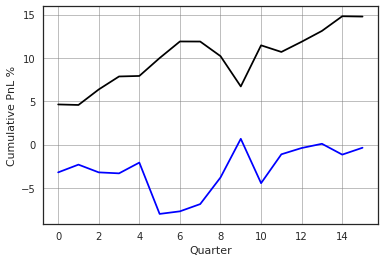

In [991]:
x1 = np.linspace(0, 15, 16)
cum_pnl_not_same = np.cumsum(avg_pnl_ceo_not_same)
cum_pnl_not_same = pd.Series(cum_pnl_not_same)
y1 = cum_pnl_not_same[x1]

x2 = np.linspace(0, 15, 16)
cum_pnl_same = np.cumsum(avg_pnl_ceo_same)
cum_pnl_same = pd.Series(cum_pnl_same)
y2 = cum_pnl_same[x2]

plt.plot(x1, y1, color='black')
plt.plot(x2, y2, color='blue')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.xlabel('Quarter')
plt.ylabel('Cumulative PnL %')

In [759]:
x1 = np.linspace(0, 15, 16)
cum_pnl_not_same = np.cumsum(avg_pnl_ceo_not_same)
y1 = avg_pnl_ceo_not_same[x]

x2 = np.linspace(0, 15, 16)
y2 = avg_pnl_ceo_same[x]

plt.plot(x1, y1, color='black')
plt.plot(x2, y2, color='blue')
plt.grid(color='grey', linestyle='-', linewidth=0.5)



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [765]:
avg_pnl_ceo_same_mkt_cap = [1] * 16
avg_pnl_ceo_not_same_mkt_cap = [1] * 16
avg_pnl_ceo_not_same_mkt_cap

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [768]:
for i in range(1,17):
    
    ceo_same_dict[i]['Product'] = ceo_same_dict[i]['Market Cap'] * ceo_same_dict[i]['Hedged Returns']
    ceo_not_same_dict[i]['Product'] = ceo_not_same_dict[i]['Market Cap'] * ceo_not_same_dict[i]['Hedged Returns']
    
# adding a column with 'Market Cap' multiplied by 'Hegded Returns'
    

avg_pnl_ceo_same_mkt_cap = {}
avg_pnl_ceo_not_same_mkt_cap = {}

# defining some new dictionaries

for i in range(1,17):
    avg_pnl_ceo_same_mkt_cap[i] = sum(ceo_same_dict[i]['Product']*(-1)) / sum(ceo_same_dict[i]['Market Cap'])
    avg_pnl_ceo_not_same_mkt_cap[i] = sum(ceo_not_same_dict[i]['Product']*(-1)) / sum(ceo_not_same_dict[i]['Market Cap'])
    
# creating dictionaries which record the PnL achieved when investing in the respective portfolios
    
avg_mk_cap_weighted = []

for i in range(1,17):
    
    avg_mk_cap_weighted.append(avg_pnl_ceo_same_mkt_cap[i] + avg_pnl_ceo_not_same_mkt_cap[i])
    
# creating a list of the quarterly returns achieved from this portfolio

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [770]:
avg_pnl_ceo_same_mkt_cap_list = list(avg_pnl_ceo_same_mkt_cap.values())
avg_pnl_ceo_not_same_mkt_cap_list = list(avg_pnl_ceo_not_same_mkt_cap.values())
avg_pnl_ceo_not_same_mkt_cap_list

[0.32275309911052597,
 -0.09758412213469377,
 0.33445686347858633,
 0.05787992043729598,
 0.004698078303201445,
 0.7818199016093266,
 -0.691751569026073,
 -0.04948771114997841,
 -0.01182466716417037,
 -0.222648570222181,
 -0.7948168496775098,
 -0.09947146829420096,
 -0.7721065297119014,
 -0.09685810592118373,
 -0.36270116315787443,
 0.04921802610181182]

Text(0,0.5,'Cumulative PnL %')

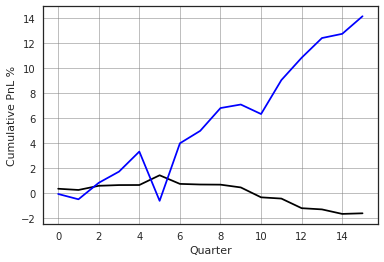

In [992]:
x1 = np.linspace(0, 15, 16)
cum_pnl_not_same = np.cumsum(avg_pnl_ceo_not_same_mkt_cap_list)
cum_pnl_not_same = pd.Series(cum_pnl_not_same)
y1 = cum_pnl_not_same[x1]

x2 = np.linspace(0, 15, 16)
cum_pnl_same = np.cumsum(avg_pnl_ceo_same_mkt_cap_list)
cum_pnl_same = pd.Series(cum_pnl_same)
y2 = cum_pnl_same[x2]

plt.plot(x1, y1, color='black')
plt.plot(x2, y2, color='blue')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.xlabel('Quarter')
plt.ylabel('Cumulative PnL %')

Text(0,0.5,'Cumulative Pnl %')

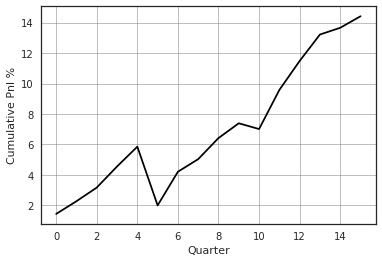

In [988]:
x = np.linspace(0, 15, 16)
y = cum_pnl[x]

#fig = plt.figure()
#ax1 = fig.add_subplot(211)
#ax1.set_ylabel('volts')
#ax1.set_title('a sine wave')
my_pnl_plot = plt.figure()
my_pnl_plot = plt.plot(x, y, color='black')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.xlabel("Quarter")
plt.ylabel("Cumulative Pnl %")
#my_pnl_plot.sex_xlabel("Quarters")
#plt.set_xlabel('Quarter')

In [739]:
p_value = get_p_value(avg_pnl)
t_stat = get_t_stat(avg_pnl)
print("t-stat:", round(t_stat,2))
print("p-value:", round(p_value,4))

p-value: 0.012665632513127911
t-stat: 2.48
p-value: 0.0127


Text(0,0.5,'Cumulative PnL %')

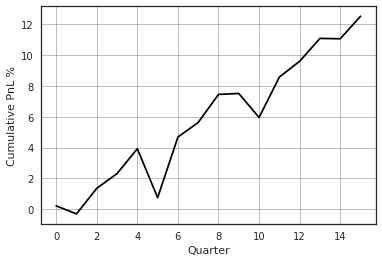

In [989]:
x = np.linspace(0, 15, 16)
y = cum_avg_mk_cap_weighted[x]

my_pnl_plot = plt.plot(x, y, color='black')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.xlabel("Quarter")
plt.ylabel("Cumulative PnL %")
#plt.set_xlabel('Quarter')

In [741]:
p_value = get_p_value(avg_mk_cap_weighted)
t_stat = get_t_stat(avg_mk_cap_weighted)
print("t-stat:", round(t_stat, 2))
print("p-value:", round(p_value,4))


p-value: 0.039193941397421606
t-stat: 1.89
p-value: 0.0392


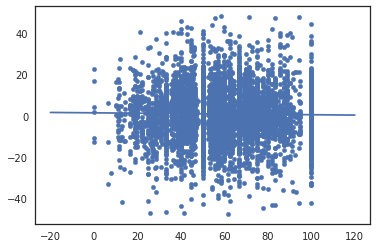

In [985]:
pct_indep_directors_plot_data = train_data[['% Independent Directors', 'Hedged Returns']]
pct_indep_directors_plot_data = pct_indep_directors_plot_data.dropna()

x = pct_indep_directors_plot_data['% Independent Directors']
y = pct_indep_directors_plot_data['Hedged Returns']

alpha = get_alpha(x,y)
beta = get_beta(x,y)

# calculating the parameters for the line of best fit

x2 = np.linspace(-20, 120, 2)
y2 = beta*x2+alpha

plt.scatter(x,y, s=20)
plt.plot(x2, y2, color='b')

# plotting the Hedged Returns against the % of Independent Directors as well as the line of best fit

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



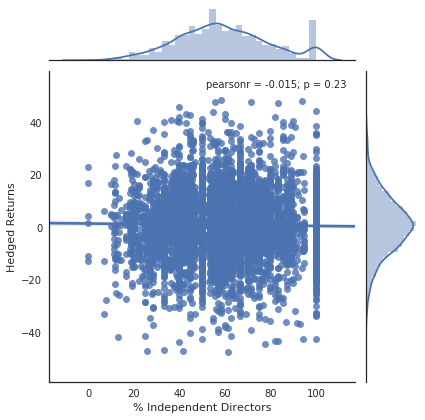

In [986]:
g = sns.jointplot("% Independent Directors", "Hedged Returns", data=pct_indep_directors_plot_data, kind="reg")

In [307]:
pct_indep_directors_plot_data = pct_indep_directors_plot_data.dropna()

x = pd.Series(pct_indep_directors_plot_data['% Independent Directors'])
y = pd.Series(pct_indep_directors_plot_data['Hedged Returns'])

rho = pearsons_correlation_coefficient(x,y)
p_value = pearsons_correlation_coefficient_test(x,y)

# calculating the pearson's correlation coefficient between '% Independent Directors' and 'Hedged Returns' and
# printing the p-value

print("correlation coefficient:", rho)
print("p-value:", p_value)

correlation coefficient: -0.015421066855005152
p-value: 0.23149317151689872


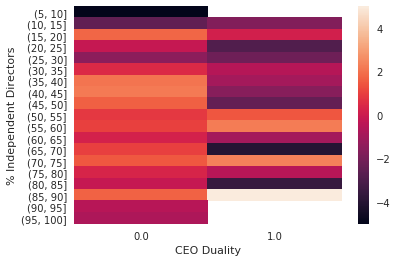

In [308]:
heat_map_data = train_data.copy()
heat_map_data['% Independent Directors'] = pd.cut(train_data['% Independent Directors'], np.arange(0, 101, 5))
heat_map_data = heat_map_data.groupby(['% Independent Directors', 'CEO Duality']).describe()['Hedged Returns']['mean']
heat_map_data = heat_map_data.unstack(level=-1)
sns.heatmap(heat_map_data, vmin=-5, vmax=5)

# plotting a heat map with % Independent Directors and CEO Duality as variables, and showing the Hedged Returns in each
# 'bin'

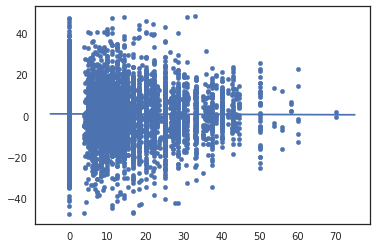

In [309]:
women_on_board_data = train_data[['% Women on Board', 'Hedged Returns']]
women_on_board_data = women_on_board_data.dropna()

x = women_on_board_data['% Women on Board']
y = women_on_board_data['Hedged Returns']

alpha = get_alpha(x,y)
beta = get_beta(x,y)

# calculating the parameters for the line of best fit

x2 = np.linspace(-5, 75, 2)
y2 = beta*x2+alpha

plt.plot(x2, y2, color='b')
plt.scatter(x,y, s=20)

# plotting the Hedged Returns against the % of Independent Directors as well as the line of best fit

In [310]:
correlation_data = women_on_board_data.dropna()

x = pd.Series(correlation_data['% Women on Board'])
y = pd.Series(correlation_data['Hedged Returns'])

rho = pearsons_correlation_coefficient(x,y)
p_value = pearsons_correlation_coefficient_test(x,y)

# calculating the pearson's correlation coefficient between '% Women on Board' and 'Hedged Returns' and printing
# the p-value

print("correlation coefficient: ", rho)
print("p-value:", p_value)

correlation coefficient:  -0.0052565208424397
p-value: 0.6647104022370419


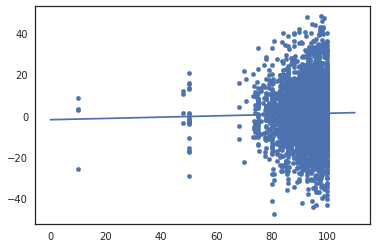

In [311]:
board_meeting_attendance_data = train_data[['Board Meeting Attendance %', 'Hedged Returns']]
board_meeting_attendance_data = board_meeting_attendance_data.dropna()

x = board_meeting_attendance_data['Board Meeting Attendance %']
y = board_meeting_attendance_data['Hedged Returns']

alpha = get_alpha(x,y)
beta = get_beta(x,y)

# calculating the parameters for the line of best fit

x2 = np.linspace(0, 110, 2)
y2 = beta*x2+alpha

plt.plot(x2, y2, color='b')
plt.scatter(x,y, s=20)

# plotting the Hedged Returns against the % of Independent Directors as well as the line of best fit



/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



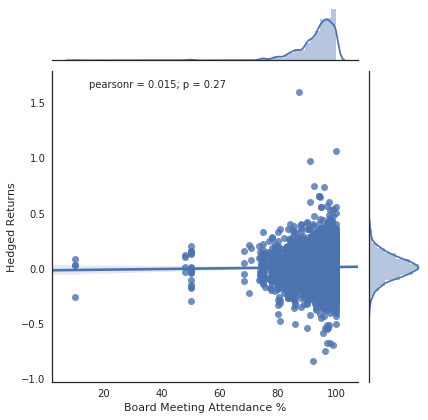

In [984]:
g = sns.jointplot("Board Meeting Attendance %", "Hedged Returns", data=board_meeting_attendance_data, kind="reg")

In [312]:
x = pd.Series(board_meeting_attendance_data['Board Meeting Attendance %'])
y = pd.Series(board_meeting_attendance_data['Hedged Returns'])

rho = pearsons_correlation_coefficient(x,y)
p_value = pearsons_correlation_coefficient_test(x,y)

# calculating the pearson's correlation coefficient between '% Women on Board' and 'Hedged Returns' and printing
# the p-value

print("correlation coefficient: ", rho)
print("p-value:", p_value)

correlation coefficient:  0.017541911038868787
p-value: 0.20753567936354914


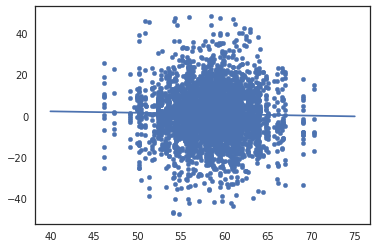

In [313]:
average_age_data = train_data[['Average Age of Board', 'Hedged Returns']]
average_age_data = average_age_data.dropna()

x = average_age_data['Average Age of Board']
y = average_age_data['Hedged Returns']

alpha = get_alpha(x,y)
beta = get_beta(x,y)

# calculating the parameters for the line of best fit

x2 = np.linspace(40, 75, 2)
y2 = beta*x2+alpha

plt.plot(x2, y2, color='b')
plt.scatter(x,y, s=20)

# plotting the Hedged Returns against the % of Independent Directors as well as the line of best fit

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/j/office/app/research-python/conda/envs/2018.06/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



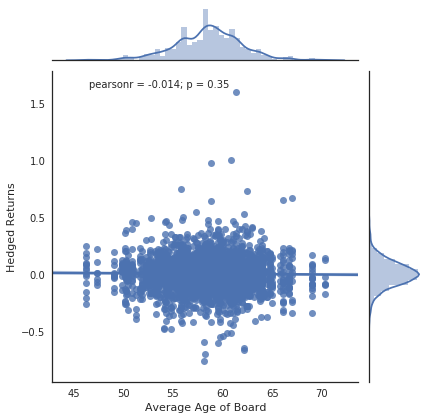

In [982]:
g = sns.jointplot("Average Age of Board", "Hedged Returns", data=average_age_data, kind="reg")

In [314]:
x = pd.Series(average_age_data['Average Age of Board'])
y = pd.Series(average_age_data['Hedged Returns'])

rho = pearsons_correlation_coefficient(x,y)
p_value = pearsons_correlation_coefficient_test(x,y)

# calculating the pearson's correlation coefficient between '% Women on Board' and 'Hedged Returns' and printing
# the p-value

print("correlation coefficient: ", rho)
print("p-value:", p_value)

correlation coefficient:  -0.019865930853565975
p-value: 0.18736614067498011


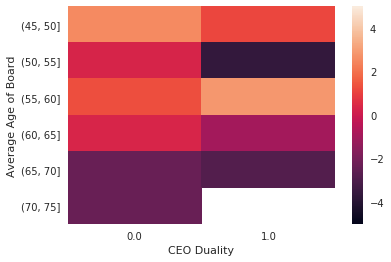

In [315]:
heat_map_data = train_data.copy()
heat_map_data['Average Age of Board'] = pd.cut(train_data['Average Age of Board'], np.arange(40, 175, 5))
heat_map_data = heat_map_data.groupby(['Average Age of Board', 'CEO Duality']).describe()['Hedged Returns']['mean']
heat_map_data = heat_map_data.unstack(level=-1)
sns.heatmap(heat_map_data, vmin=-5, vmax=5)

# plotting a heat map with Average Age of the Board and CEO Duality as variables, and showing the Hedged Returns in each
# 'bin'

In [316]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence #haven't actually used this yet

# importing the necessary SciKit Learn modules for Machine Learning

In [317]:
imp = Imputer(missing_values = 'NaN', strategy = 'mean')

def dataframe_imputer(df):
    
    imp.fit(df)
    imputed = imp.transform(df)
    imputed = pd.DataFrame(imputed)
    
    return imputed

# defining an imputer function which takes a dataframe as an argument and outputs a new dataframe with
# NaNs replaced by imputed 'mean' values

In [318]:
def model_tester(model, X_train, y_train, X_test, y_test):
    
    X_train = dataframe_imputer(X_train)
    X_test = dataframe_imputer(X_test)
    
    tuned_model = model(X_train, y_train)
    y_preds = tuned_model.predict(X_test)
    mae = mean_absolute_error(y_preds, y_test)
    
    return mae

# defining a function which takes as arguments a model and the training and testing datasets
# It outputs the mean absolute error of the model's predictions when trained on the training set
# and tested on the testing set

In [319]:
def decision_tree_mae(train_X, test_X, train_y, test_y, max_leaf_nodes):
    
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, 
                                  random_state=0)
    model.fit(train_X, train_y)
    preds_y = model.predict(test_X)
    mae = mean_absolute_error(test_y, preds_y)
    
    return mae

# defining a function which takes as arguments the training and testing data as well as the max_leaf_nodes
# parameter. It outputs the mean absolute error of a decision tree model trained and tested with the data


def decision_tree_crossval_mae(data_X, data_y, max_leaf_nodes, no_of_iterations):
    
    n = no_of_iterations
    
    list_of_maes = []
    
    for i in range(0, n):
        
        X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, 
                                                            test_size=0.4, random_state=i)
        
        mae = decision_tree_mae(X_train, X_test, y_train, y_test, max_leaf_nodes)
        
        list_of_maes.append(mae)
        
    ret = sum(list_of_maes) / len(list_of_maes)
    
    return ret

# defining a function which takes as arguments the predictor and responder data as well as the max_leaf_nodes
# and number of iterations, n. It then outputs the mean absolute error when crossvalidated by n train-test
# splits


def best_max_leaf_nodes(n, data_X, data_y):
    
    x =[]
    
    for i in range(2, n):
        
        x.append(decision_tree_crossval_mae(data_X, data_y, i, 25))
        
    m = min(x)
    
    ret = [i for i, j in enumerate(x) if j == m]
    ret = min(ret) + 2
    
    print("max leaf nodes:", ret)
    
    return ret

# defining a function which outputs the value for 'max_leaf_nodes' which scores best when crossvalidated with
# 25 different train-test splits. It also prints this value.


def decision_tree_model(data_X, data_y):
    
    max_leaf_nodes = best_max_leaf_nodes(25, data_X, data_y)
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, 
                                  random_state=0)
    model.fit(data_X, data_y)
    
    return model

# defining a function which takes our data as arguments and outputs a decision tree model which uses the 'best'
# max_leaf_nodes parameter as validated by the training sample

In [320]:
def random_forest_mae(train_X, test_X, train_y, test_y, max_leaf_nodes):
    
    model = RandomForestRegressor(max_leaf_nodes = max_leaf_nodes, 
                                  random_state=0)
    model.fit(train_X, train_y)
    preds_y = model.predict(test_X)
    mae = mean_absolute_error(test_y, preds_y)
    
    return mae

# defining a function which takes as arguments the training and testing data as well as the max_leaf_nodes
# parameter. It outputs the mean absolute error of a random forest model trained and tested with the data

def random_forest_crossval_mae(data_X, data_y, max_leaf_nodes, no_of_iterations):
    
    n = no_of_iterations
    
    list_of_maes = []
    
    for i in range(0, n):
        
        X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, 
                                                            test_size=0.4, random_state=i)
        
        mae = random_forest_mae(X_train, X_test, y_train, y_test, max_leaf_nodes)
        
        list_of_maes.append(mae)
        
    ret = sum(list_of_maes) / len(list_of_maes)
    
    return ret

# defining a function which takes as arguments the predictor and responder data as well as the max_leaf_nodes
# and number of iterations, n. It then outputs the mean absolute error when crossvalidated by n train-test
# splits


def best_max_leaf_nodes_2(n, data_X, data_y):
    
    x =[]
    
    for i in range(2, n):
        
        x.append(random_forest_crossval_mae(data_X, data_y, i, 25))
        
    m = min(x)
    
    ret = [i for i, j in enumerate(x) if j == m]
    
    ret = min(ret) + 2
    
    print("max leaf nodes:", ret)
    
    return ret

# defining a function which outputs the value for 'max_leaf_nodes' which scores best when crossvalidated with
# 25 different train-test splits. It also prints this value.


def random_forest_model(data_X, data_y):
    
    mln = best_max_leaf_nodes_2(25, data_X, data_y)
    model = RandomForestRegressor(max_leaf_nodes = mln, 
                                  random_state=0)
    model.fit(data_X, data_y)
    
    return model

# defining a function which takes our data as arguments and outputs a random forest model which uses the 'best'
# max_leaf_nodes parameter as validated by the training sample

In [321]:
data_X = train_data[['CEO Duality', '% Independent Directors', 'Average Age of Board']]
data_y = train_data['Hedged Returns']

# collecting data with the relevant fields

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, 
                                                            test_size=0.4, random_state=0)

# splitting data into training and testing sets

In [322]:
model_tester(random_forest_model, X_train, y_train, X_test, y_test)

# testing my random forest model

max leaf nodes: 2


9.238421583001754

In [323]:
model_tester(decision_tree_model, X_train, y_train, X_test, y_test)

# testing my decision tree model

max leaf nodes: 2


9.23439010316373

In [324]:
test_vector = [abs(x) for x in y_test]

avg = sum(test_vector) / len(test_vector)
avg

# comparing with the mean absolute error

9.26299280082277

In [325]:
#import xgboost as xgb

In [326]:
#xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=100)
#X_train = dataframe_imputer(X_train)
#X_test = dataframe_imputer(X_test)


#xgb_model.fit(X_train, y_train)
#y_pred = xgb_model.predict(X_test)

#mse=mean_absolute_error(y_test, y_pred)

#print(mse)

In [327]:
#X_train = dataframe_imputer(X_train)
#X_test = dataframe_imputer(X_test)

#clf = decision_tree_model(X_train, y_train)
#y_preds = clf.predict(X_test)
#print(mean_absolute_error(y_preds, y_test))
#X, y = get_some_data()
# scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
# this was due to an implementation detail, and a future release will support all model types.
#my_model = GradientBoostingRegressor()
# fit the model as usual
#my_model.fit(X, y)
# Here we make the plot
#my_plots = plot_partial_dependence(my_model,       
#                                   features=[0, 2], # column numbers of plots we want to show
#                                   X=X,            # raw predictors data.
#                                   feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
#                                   grid_resolution=10)

In [328]:
X_train.head()

,CEO Duality,% Independent Directors,Average Age of Board
514,0.0,NaN,53.500000
1678,0.0,57.141999,NaN
1011,0.0,57.142899,57.428600
7179,0.0,71.428596,62.700001
2986,0.0,66.670000,NaN


In [329]:
from sklearn.ensemble import GradientBoostingRegressor

my_model = GradientBoostingRegressor()
my_model.fit(X_train, y_train)

my_plots = plot_partial_dependence(my_model, features = [0, 1, 2], 
                                   X=X_test, feature_names = ['CEO Duality', '% Independent Directors', 'Average Age of Board'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
def get_partial_dependence_plots(model, X_train, y_train, X_test, y_test):
    
    my_model = model(X_train, y_train)
    
    my_plots = plot_partial_dependence(my_model, X=X_test)
    
    return my_plots

In [ ]:
get_partial_dependence_plots(decision_tree_model, X_train, y_train)